3 1


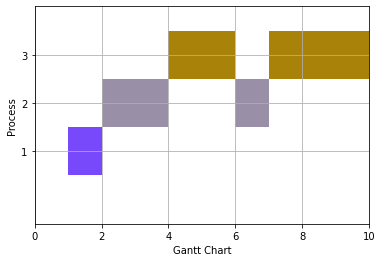

In [94]:
import matplotlib.pyplot as plt
import string
import random

fig, gnt = plt.subplots()

f = open("pytxt.txt", 'r')
line = f.readline()
line = line.strip()
run_tuple = tuple(map(int, line.split(' ')))


process_num = run_tuple[0] # process의 총 갯수
finsh_time = 1 # 마지막 프로세스가 끝나는 시간

process_list = [] # 프로세스를 저장할 리스트
y_ticks = [] # 그래프의 위치
y_ticks_label = [] # y축 Label

# 프로세스 갯수만큼 y축 설정, 이중리스트 생성
for i in range(process_num):
    line = []
    process_list.append(line)
    y_ticks.append((i) * 10 + 15)
    y_ticks_label.append(i+1)

# 파일을 끝까지 읽으며 프로세스 정보(튜플)를 리스트에 넣음.
while True:
    line = f.readline()
    #EOF
    if not line: 
        break
    line = line.strip()
    inp = tuple(map(int, line.split(' ')))
    
    # 다 읽었을 때
    if len(inp) == 1 :
        finsh_time = inp[0];
        break;
    
    tu = (inp[1], inp[2])
    finsh_time += inp[2]
    process_list[inp[0]-1].append(tu)
f.close()


gnt.set_xlim(0, finsh_time) #set_xlim(x축 시작값, x축 끝값)
gnt.set_ylim(0, 15 * process_num) #set_ylim(y축 시작값, y축 끝값)

# x축, y축 label
gnt.set_xlabel('Gantt Chart')
gnt.set_ylabel('Process')


gnt.set_yticks(y_ticks) # y축 값의 위치
gnt.set_yticklabels(y_ticks_label) # y값 label
gnt.grid(True)


# 프로세스를 Gantt-Chart 형태로 보여줌
for i in range(process_num):
    color = ("#" + ''.join(random.choices("ABCDEF" + string.digits, k=6))) # 랜덤 색상
    gnt.broken_barh(process_list[i], (i*10 + 10, 10),
						facecolors =color)

# 결과를 저장
plt.savefig("result_gantt.png")